# Avacado Project

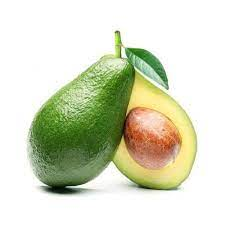

## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation


Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


### Importing all important libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
df=pd.read_csv(r"avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Sampling the - Above Dataset as it has huge Rows count

In [81]:
# generating one row 
rows = df.sample(frac =.25)
  
# checking if sample is 0.25 times data or not
  
if (0.25*(len(df))== len(rows)):
    print( "Frame")
    print(len(df), len(rows))
  
df.columns.value_counts().sum()

14

In [82]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11430,16,2015-09-06,2.00,4032.41,541.49,1732.31,545.05,1213.56,1166.16,47.40,0.0,organic,2015,SouthCarolina
10857,15,2015-09-13,1.90,7622.55,5346.57,1082.07,0.00,1193.91,968.39,225.52,0.0,organic,2015,PhoenixTucson
3080,12,2016-10-02,1.35,132143.53,1119.57,62757.12,90.39,68176.45,68176.45,0.00,0.0,conventional,2016,BuffaloRochester
1407,3,2015-12-06,0.94,185395.20,117854.69,21553.04,325.00,45662.47,41822.80,3839.67,0.0,conventional,2015,NewOrleansMobile
7660,30,2017-06-04,1.38,261051.50,68705.59,108536.25,2472.06,81337.60,77842.84,1729.76,1765.0,conventional,2017,RichmondNorfolk


we have generated the 25% Sample of the above data which can be used for further Analysis

In [83]:
rows.shape

(4562, 14)

### Checking for the Null values in the Dataset

In [84]:
rows.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Checking with the Heatmap

<AxesSubplot:>

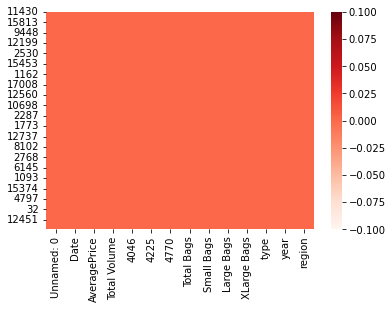

In [85]:
sns.heatmap(rows.isna(), cmap='Reds')

### We have no null values in these dataset

### Statistical information

In [86]:
rows.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,4562.000000,4562.000000,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4562.000000,4562.000000
mean,24.177554,1.409281,8.025656e+05,2.753967e+05,2.838977e+05,2.212023e+04,2.211488e+05,1.687879e+05,4.939426e+04,2966.609700,2016.149277
std,15.672348,0.402675,3.174956e+06,1.183459e+06,1.133388e+06,9.675490e+04,8.801173e+05,6.660968e+05,2.179670e+05,16634.003211,0.942939
min,0.000000,0.490000,4.822600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.099817e+04,8.930025e+02,3.266158e+03,0.000000e+00,4.915435e+03,2.730327e+03,1.293550e+02,0.000000,2015.000000
50%,24.000000,1.380000,1.071027e+05,8.866440e+03,2.943369e+04,1.841800e+02,4.047448e+04,2.714065e+04,2.642055e+03,0.000000,2016.000000
75%,38.000000,1.680000,4.273012e+05,1.107221e+05,1.428193e+05,6.708720e+03,1.087598e+05,8.240918e+04,2.174593e+04,115.280000,2017.000000
max,52.000000,3.000000,4.465546e+07,1.893304e+07,1.895648e+07,1.686475e+06,1.505188e+07,1.066694e+07,4.081398e+06,390478.730000,2018.000000


so we can see that the dataset has -- high std deviation between the data as we have high std deviation at the column in Large Bags and X large Bags

as there is also the high chances that where the deviation is high there might be the also asymetrric or skewed. Also we can see that the 2nd quartile and the max value diffrences are also high so there are chances of Outliers

### Checking for the Datatypes

In [87]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 11430 to 4287
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4562 non-null   int64  
 1   Date          4562 non-null   object 
 2   AveragePrice  4562 non-null   float64
 3   Total Volume  4562 non-null   float64
 4   4046          4562 non-null   float64
 5   4225          4562 non-null   float64
 6   4770          4562 non-null   float64
 7   Total Bags    4562 non-null   float64
 8   Small Bags    4562 non-null   float64
 9   Large Bags    4562 non-null   float64
 10  XLarge Bags   4562 non-null   float64
 11  type          4562 non-null   object 
 12  year          4562 non-null   int64  
 13  region        4562 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 534.6+ KB


we have 3 categeorical variables in the dataset

Date
type
region

About the features in dataset

Date = The date of the observation

Averageprice = Average price of single avacado

Total Volume = Total number of avacados sold

4046 = Total number of avacados with PLU-4046 sold

4225 = Total number of avacados with PLU-4225 sold

4770 = Total number of avacados with PLU-4770 sold

The goal is to predict the average cost of the avocado which is continuous in nature for different types

In this dataset most of the columns are float type in nature

Date,type,region are categeorical in Nature

### Columns in Dataset

In [88]:
rows.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### unique elements in each of the columns

In [89]:
rows.nunique()

Unnamed: 0        53
Date             169
AveragePrice     230
Total Volume    4562
4046            4485
4225            4541
4770            3152
Total Bags      4550
Small Bags      4440
Large Bags      3850
XLarge Bags     1501
type               2
year               4
region            54
dtype: int64

### Exploration of the Dataset (EDA)


#### Univariate Analysis

In [90]:
rows['type'].value_counts()

conventional    2288
organic         2274
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

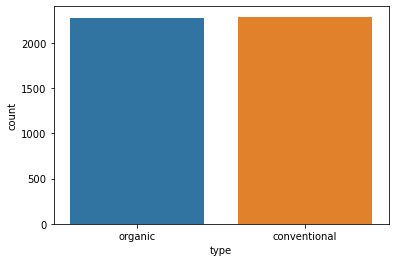

In [91]:
sns.countplot(rows.type)

In [92]:
rows['year'].value_counts()

2017    1444
2015    1413
2016    1380
2018     325
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

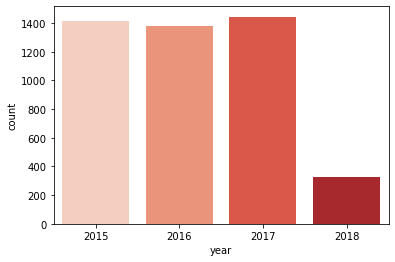

In [93]:
# Visualization of year value counts
sns.countplot(rows.year, palette='Reds')

In 2018 there is very much less data compared to other years

In [94]:
rows['region'].value_counts()

Columbus               100
SanFrancisco           100
Detroit                 97
Denver                  97
GreatLakes              97
GrandRapids             94
CincinnatiDayton        93
West                    92
Spokane                 92
Sacramento              92
Seattle                 92
Roanoke                 91
SouthCarolina           91
Boston                  90
Northeast               90
Albany                  90
Louisville              90
Midsouth                89
SanDiego                89
HarrisburgScranton      89
Orlando                 89
RaleighGreensboro       88
LosAngeles              88
Charlotte               88
Boise                   87
California              86
Southeast               86
Pittsburgh              86
Chicago                 85
PhoenixTucson           85
SouthCentral            85
RichmondNorfolk         84
Nashville               84
BaltimoreWashington     83
Indianapolis            83
Jacksonville            82
Houston                 81
S

<AxesSubplot:xlabel='region'>

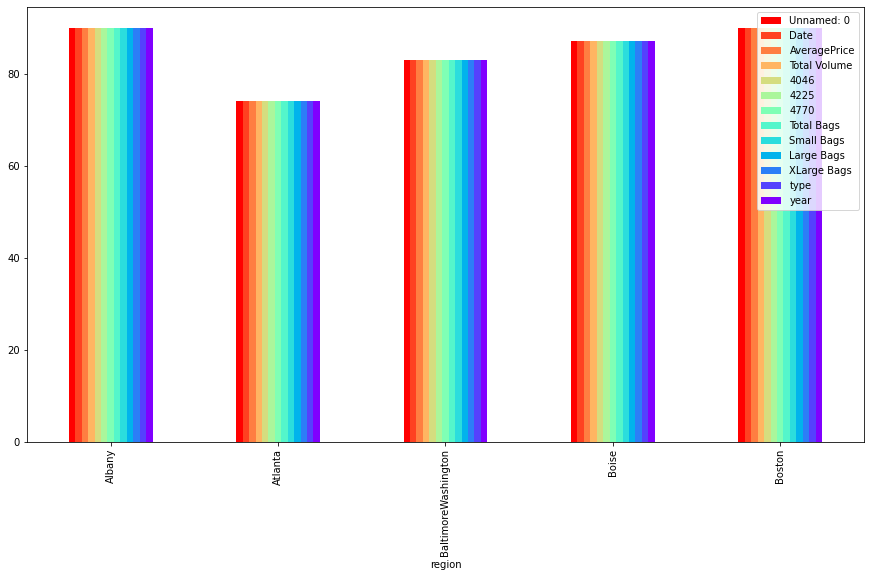

In [95]:
rows.groupby(['region']).count().head().plot(kind='bar', figsize=(15,8),cmap='rainbow_r')

### First 25 regions

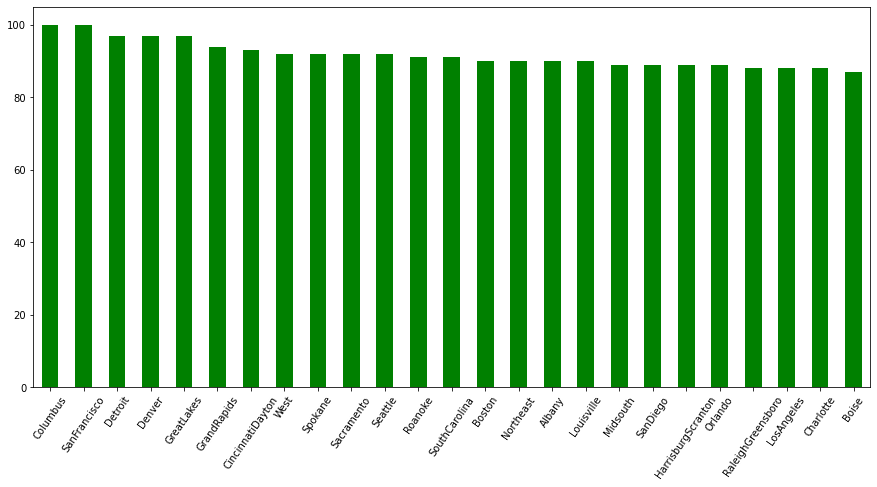

In [96]:
plt.figure(figsize=(15,7))
rows.region.value_counts(ascending = False).head(25).plot(kind = 'bar', color='green');
plt.xticks(rotation = 55);

### Left more regions

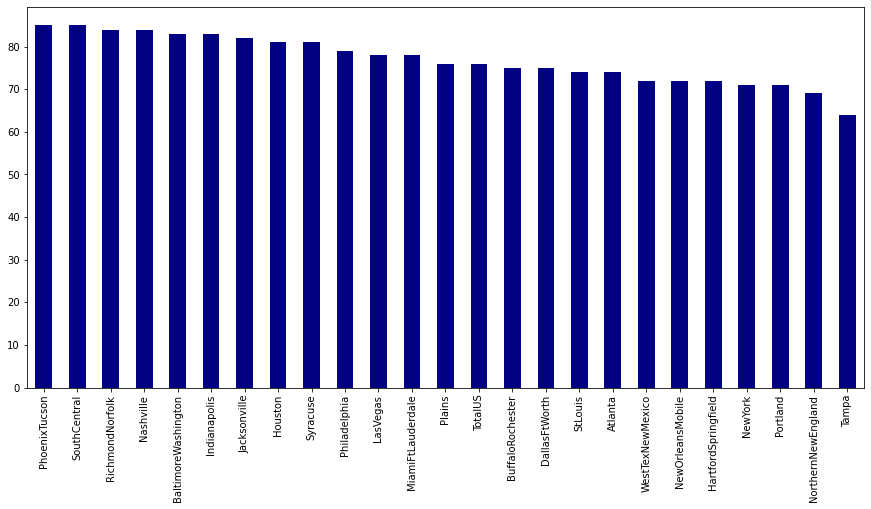

In [97]:
plt.figure(figsize=(15,7))
rows.region.value_counts(ascending = False).tail(25).plot(kind = 'bar', color='navy');
plt.xticks(rotation = 90);

Type has 2 unique values (conventional, organic)

Year has 4 unique values which are of discrete type(2015,2016,2017,2018)

region has 54 unique values

In [98]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11430,16,2015-09-06,2.00,4032.41,541.49,1732.31,545.05,1213.56,1166.16,47.40,0.0,organic,2015,SouthCarolina
10857,15,2015-09-13,1.90,7622.55,5346.57,1082.07,0.00,1193.91,968.39,225.52,0.0,organic,2015,PhoenixTucson
3080,12,2016-10-02,1.35,132143.53,1119.57,62757.12,90.39,68176.45,68176.45,0.00,0.0,conventional,2016,BuffaloRochester
1407,3,2015-12-06,0.94,185395.20,117854.69,21553.04,325.00,45662.47,41822.80,3839.67,0.0,conventional,2015,NewOrleansMobile
7660,30,2017-06-04,1.38,261051.50,68705.59,108536.25,2472.06,81337.60,77842.84,1729.76,1765.0,conventional,2017,RichmondNorfolk


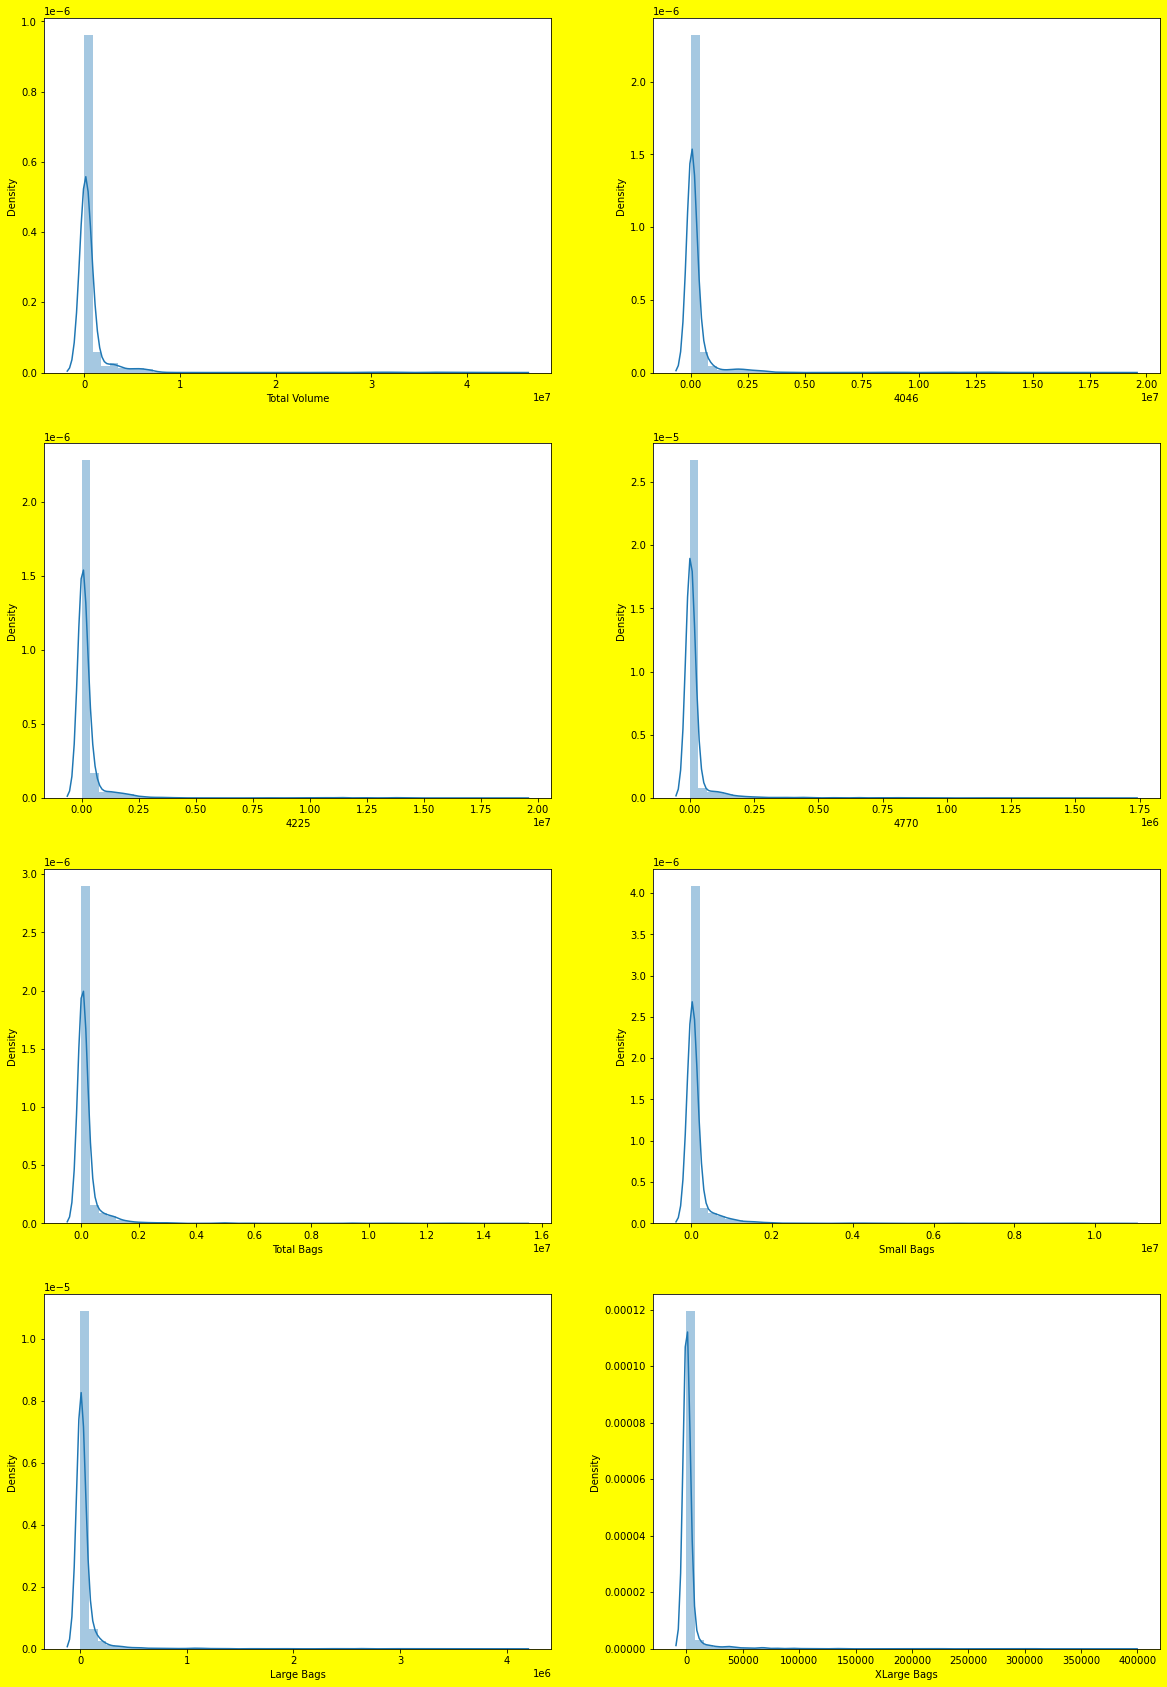

In [99]:
num_cols = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(20,30),facecolor='yellow')
plotnum = 1
for i in num_cols:
    if plotnum <=10:
        plt.subplot(4,2,plotnum)
        sns.distplot(rows[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

Total Volume,4046,4225,4770 has the binomial distribution.

Total Bags,Small bags,Large Bags, XLarge Bags has the skewness presentin it.

### Comparision of year and 4046,4225,4770

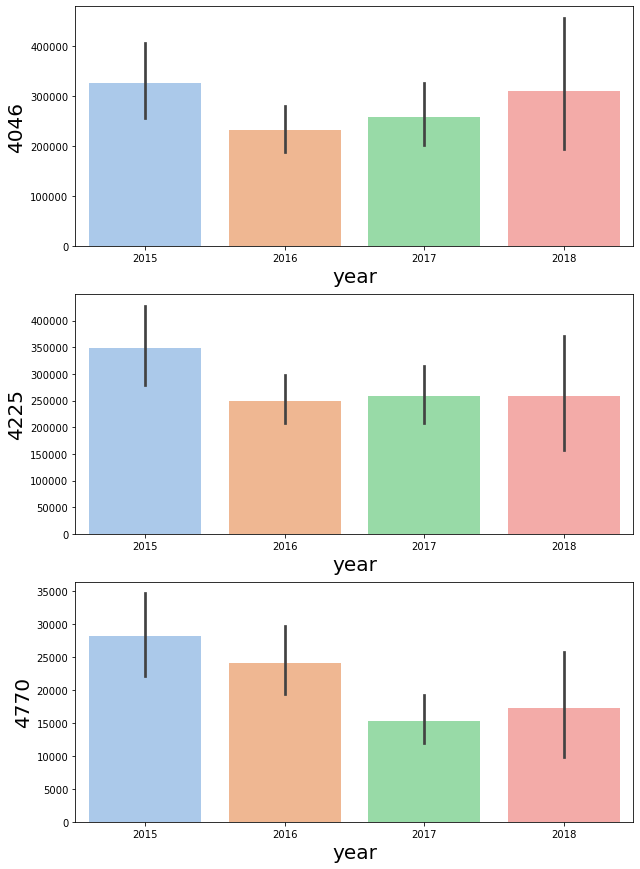

In [100]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['year']
plt.figure(figsize=(10,15),facecolor='white', edgecolor='b')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='pastel')
    plt.xlabel('year',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

PLU 4046 has grown over the 4 years

compared to PLU-4225 production PLU-4046 is more

PLU-4770 is least produced

### Comparision of different PLU's and type

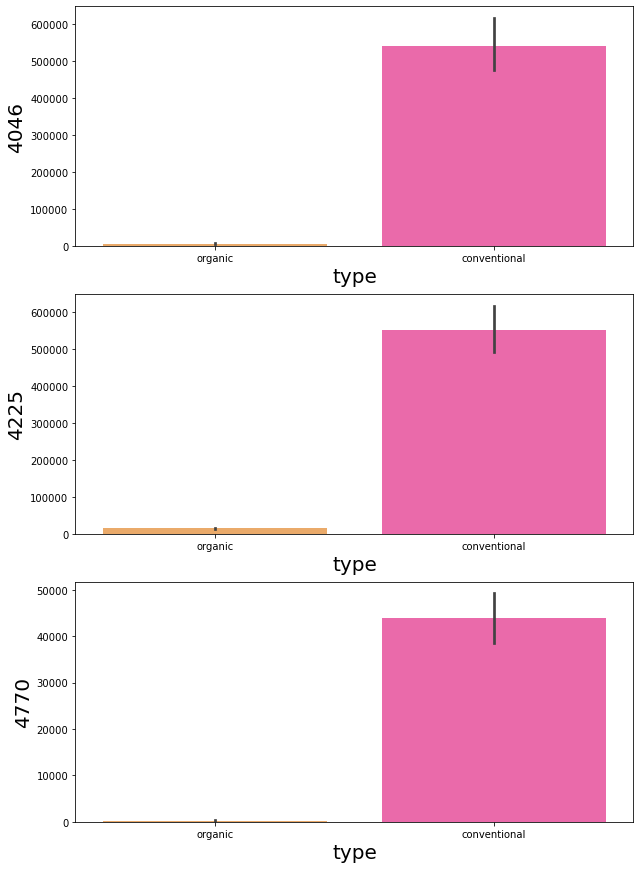

In [101]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['type']
plt.figure(figsize=(10,15),facecolor='white')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='spring_r')
    plt.xlabel('type',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

Production of conventional_type is more in cases 4046,4225,4770.

By this we can say less production high demand the organic rates we can assume as higher

### Comparision of avaerage prices in different years

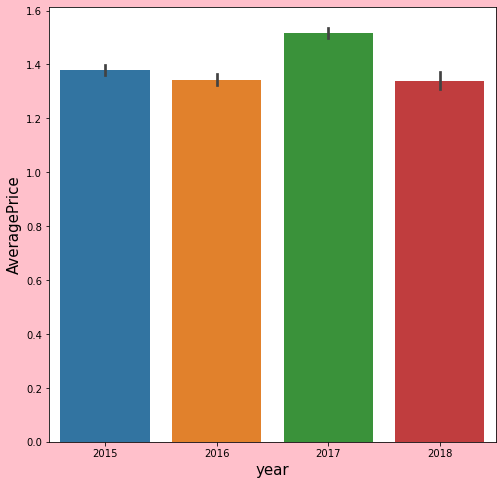

In [102]:
y_cols = rows['AveragePrice']
x_cols = rows[['year']]
plt.figure(figsize=(8,8),facecolor='pink')
plotnum = 1
for cols in x_cols:
    plt.subplot(1,1,plotnum)
    sns.barplot(x_cols[cols],y_cols)
    plt.xlabel(cols,fontsize=15)
    plt.ylabel('AveragePrice',fontsize=15)
    plotnum+=1
plt.show()

Average price is maximum in year 2017

<AxesSubplot:xlabel='year'>

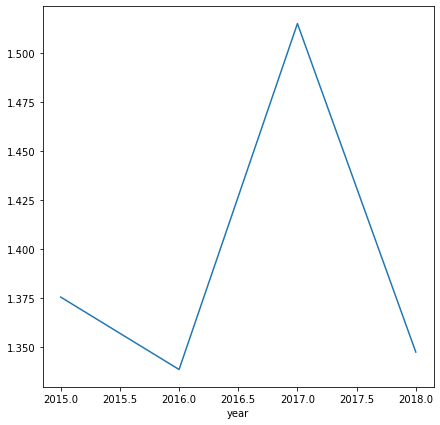

In [103]:
plt.figure(figsize=(7,7))
df.groupby('year')['AveragePrice'].mean().plot(kind='line')

There is dip in AveragePrice in 2016 and hike in AveragePrice in 2017

In [104]:
# Values of the year and average price
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [105]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

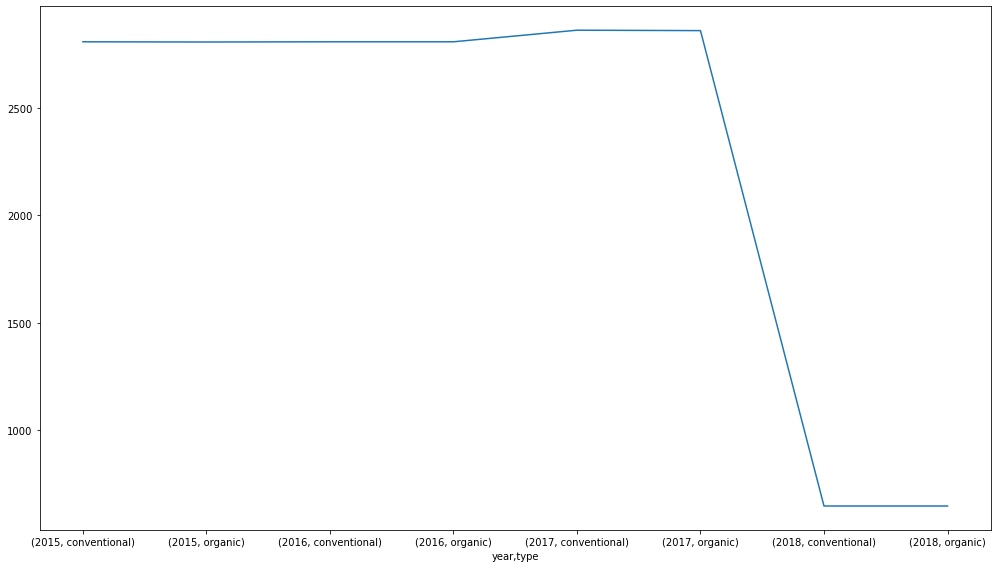

In [106]:
plt.figure(figsize=(14,8))
df.groupby('year')['type'].value_counts().plot()
plt.tight_layout()

In 2018 the production is comparatively less in organic and conventional type.

#### Extracting Date and month from Date feature not creating year because it is already present in dataset

In [107]:
rows['Date'] = pd.to_datetime(rows['Date'])     # changing the object type to datetime type
rows['Day'] = rows['Date'].apply(lambda d:d.day)# Extracting the date and adding to df
rows['Month'] = rows['Date'].apply(lambda m:m.month)#Extracting month and adding to df

In [108]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
11430,16,2015-09-06,2.00,4032.41,541.49,1732.31,545.05,1213.56,1166.16,47.40,0.0,organic,2015,SouthCarolina,6,9
10857,15,2015-09-13,1.90,7622.55,5346.57,1082.07,0.00,1193.91,968.39,225.52,0.0,organic,2015,PhoenixTucson,13,9
3080,12,2016-10-02,1.35,132143.53,1119.57,62757.12,90.39,68176.45,68176.45,0.00,0.0,conventional,2016,BuffaloRochester,2,10
1407,3,2015-12-06,0.94,185395.20,117854.69,21553.04,325.00,45662.47,41822.80,3839.67,0.0,conventional,2015,NewOrleansMobile,6,12
7660,30,2017-06-04,1.38,261051.50,68705.59,108536.25,2472.06,81337.60,77842.84,1729.76,1765.0,conventional,2017,RichmondNorfolk,4,6


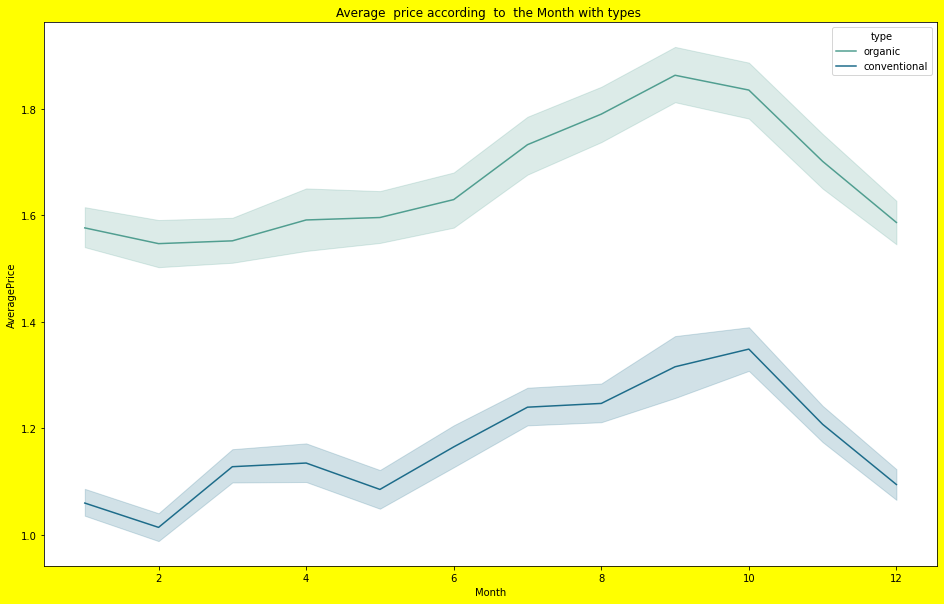

In [109]:
plt.figure(figsize=(16,10),facecolor='yellow')
sns.lineplot(x='Month',y='AveragePrice', hue = 'type',data=rows, palette='crest')
plt.title('Average  price according  to  the Month with types ')
plt.show()

Hike can be seen between 8-10 month

### Dropping some of the columns

As we observe the sum of 4046,4225,4770,Total Bags is Total Volume Column

The sum of Small Bags,Large Bags,XLarge Bags is Total Bags feature

In [110]:
rows.drop(columns=['Date','Total Volume','Total Bags'],inplace=True,axis=1)
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
11430,16,2.00,541.49,1732.31,545.05,1166.16,47.40,0.0,organic,2015,SouthCarolina,6,9
10857,15,1.90,5346.57,1082.07,0.00,968.39,225.52,0.0,organic,2015,PhoenixTucson,13,9
3080,12,1.35,1119.57,62757.12,90.39,68176.45,0.00,0.0,conventional,2016,BuffaloRochester,2,10
1407,3,0.94,117854.69,21553.04,325.00,41822.80,3839.67,0.0,conventional,2015,NewOrleansMobile,6,12
7660,30,1.38,68705.59,108536.25,2472.06,77842.84,1729.76,1765.0,conventional,2017,RichmondNorfolk,4,6


In [111]:
rows.columns.value_counts().sum()

13

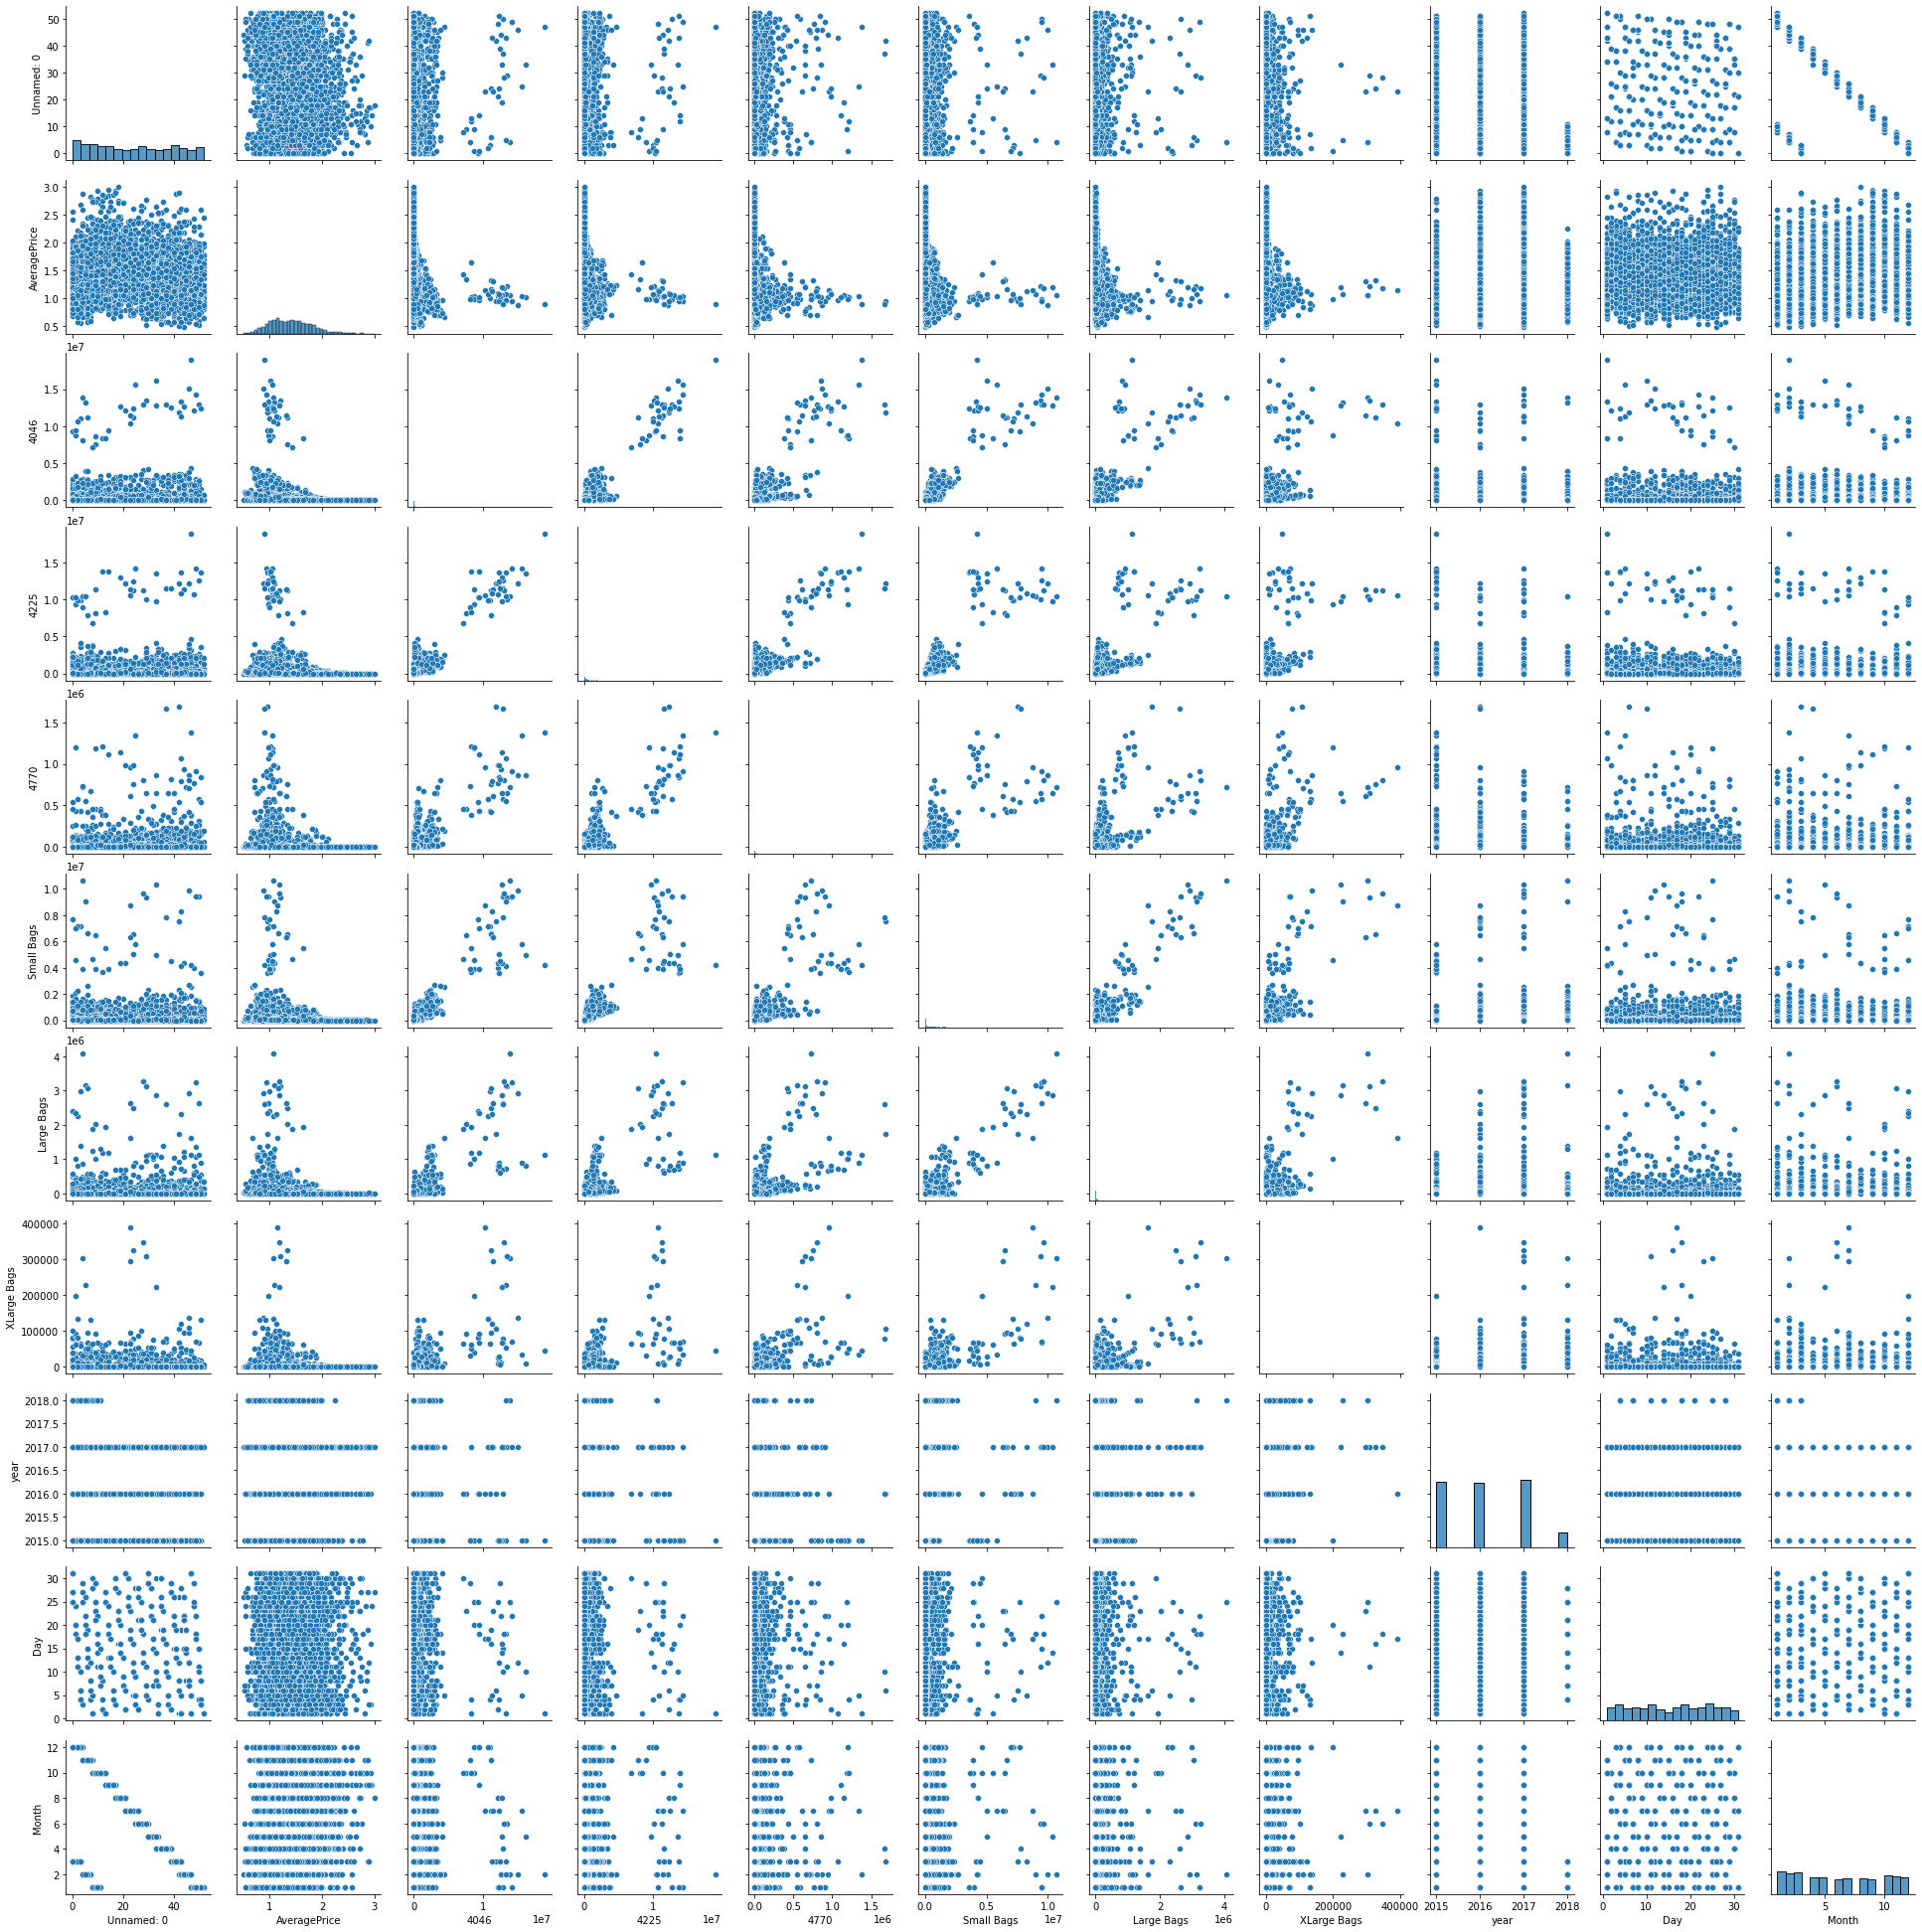

In [112]:
sns.pairplot(rows)

### Checking for the Outliers in the Dataset

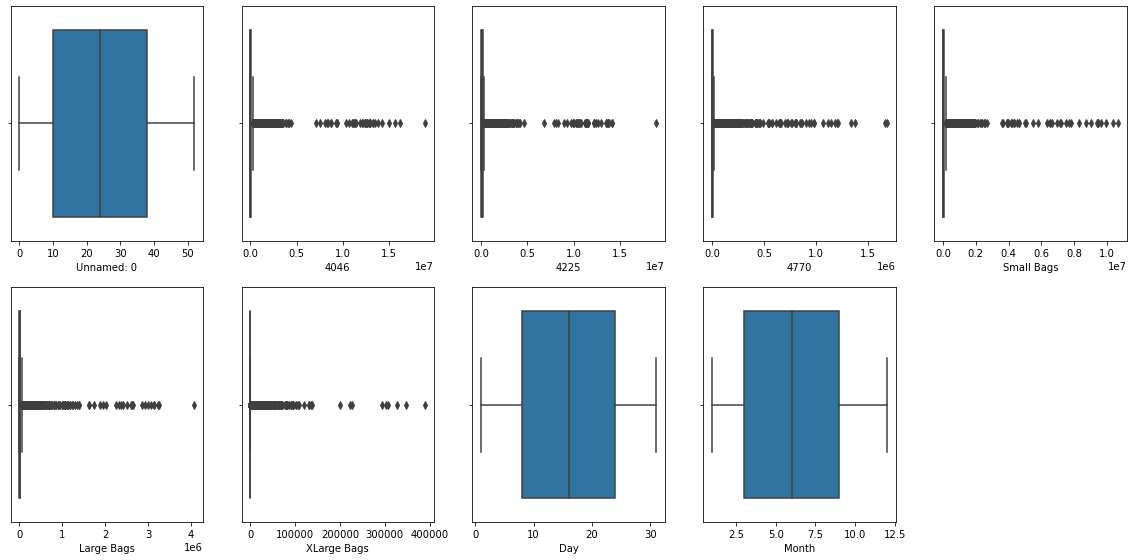

In [113]:
#### Finding outliers in the dataset
def check_outliers(data_f):
    plt.figure(figsize=(20,25),facecolor='white')
    plotnum = 1
    for feature in data_f.drop(columns=['year','type','region','AveragePrice'],axis=1):
        if plotnum <= 16:
            plt.subplot(5,5,plotnum)
            sns.boxplot(data_f[feature])
            plt.xlabel(feature)
        plotnum+=1
    plt.show()
check_outliers(rows)

### Checking for skewness

In [114]:
rows.skew()

Unnamed: 0       0.110533
AveragePrice     0.537667
4046             8.981683
4225             9.054741
4770             8.982581
Small Bags       9.881697
Large Bags      10.164514
XLarge Bags     13.188095
year             0.209227
Day             -0.022086
Month            0.110961
dtype: float64

### Checking for the correlation

In [115]:
rows.corr()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,1.000000,-0.141816,0.023256,0.027100,0.049691,0.002891,0.004371,-0.021148,-0.176683,-0.079324,-0.783398
AveragePrice,-0.141816,1.000000,-0.214086,-0.182239,-0.194697,-0.185129,-0.181795,-0.121169,0.086961,0.024365,0.175794
4046,0.023256,-0.214086,1.000000,0.922709,0.832122,0.909826,0.811949,0.641618,-0.014463,-0.011679,-0.027735
4225,0.027100,-0.182239,0.922709,1.000000,0.874695,0.891326,0.762452,0.622622,-0.029746,-0.027779,-0.021228
4770,0.049691,-0.194697,0.832122,0.874695,1.000000,0.774398,0.643099,0.626111,-0.051805,-0.026120,-0.039648
Small Bags,0.002891,-0.185129,0.909826,0.891326,0.774398,1.000000,0.899290,0.767295,0.055108,-0.002901,-0.022266
Large Bags,0.004371,-0.181795,0.811949,0.762452,0.643099,0.899290,1.000000,0.689768,0.077467,-0.003774,-0.025047
XLarge Bags,-0.021148,-0.121169,0.641618,0.622622,0.626111,0.767295,0.689768,1.000000,0.088041,0.004675,-0.014134
year,-0.176683,0.086961,-0.014463,-0.029746,-0.051805,0.055108,0.077467,0.088041,1.000000,0.008852,-0.167653
Day,-0.079324,0.024365,-0.011679,-0.027779,-0.026120,-0.002901,-0.003774,0.004675,0.008852,1.000000,0.014262


<AxesSubplot:>

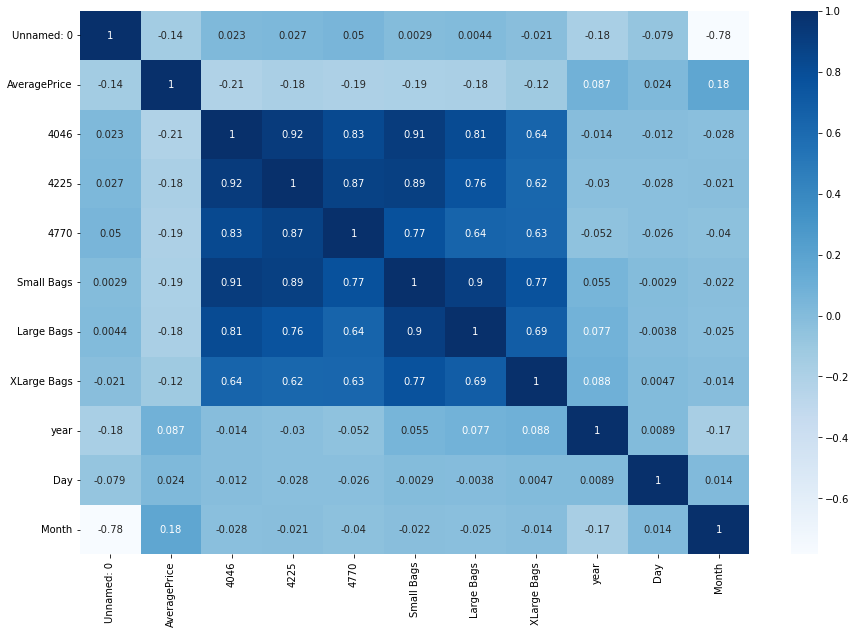

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.corr(), annot=True, cmap='Blues')

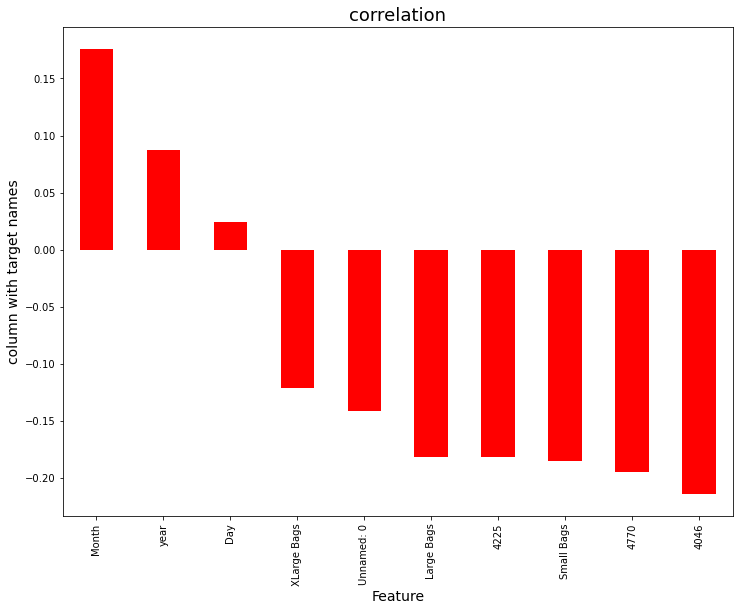

In [117]:
plt.figure(figsize=(12,9))
rows.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

XLargebags , 4225,4770,Large bags,Small bags, 4046 having negative or are in inversly propotional in the Dataset

In [118]:
rows.cov()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,245.622491,-0.894983,4.313515e+05,4.813675e+05,7.534979e+04,3.018257e+04,1.493285e+04,-5.513089e+03,-2.611031,-10.916057,-43.943051
AveragePrice,-0.894983,0.162147,-1.020226e+05,-8.317141e+04,-7.585560e+03,-4.965550e+04,-1.595610e+04,-8.116001e+02,0.033019,0.086149,0.253357
4046,431351.548624,-102022.589964,1.400575e+12,1.237647e+12,9.528249e+10,7.172139e+11,2.094464e+11,1.263068e+10,-16139.244021,-121361.500070,-117478.038205
4225,481367.479603,-83171.413123,1.237647e+12,1.284569e+12,9.591987e+10,6.729033e+11,1.883571e+11,1.173815e+10,-31790.510147,-276450.581787,-86109.906847
4770,75349.786396,-7585.559895,9.528249e+10,9.591987e+10,9.361511e+09,4.990849e+10,1.356255e+10,1.007677e+09,-4726.372603,-22190.594228,-13729.973089
Small Bags,30182.569166,-49655.503759,7.172139e+11,6.729033e+11,4.990849e+10,4.436849e+11,1.305652e+11,8.501521e+09,34612.976998,-16968.222370,-53082.169224
Large Bags,14932.848593,-15956.098969,2.094464e+11,1.883571e+11,1.356255e+10,1.305652e+11,4.750960e+10,2.500867e+09,15921.668362,-7222.998695,-19539.640107
XLarge Bags,-5513.088993,-811.600098,1.263068e+10,1.173815e+10,1.007677e+09,8.501521e+09,2.500867e+09,2.766901e+08,1380.915484,682.780458,-841.445898
year,-2.611031,0.033019,-1.613924e+04,-3.179051e+04,-4.726373e+03,3.461298e+04,1.592167e+04,1.380915e+03,0.889135,0.073289,-0.565807
Day,-10.916057,0.086149,-1.213615e+05,-2.764506e+05,-2.219059e+04,-1.696822e+04,-7.222999e+03,6.827805e+02,0.073289,77.100430,0.448201


<AxesSubplot:>

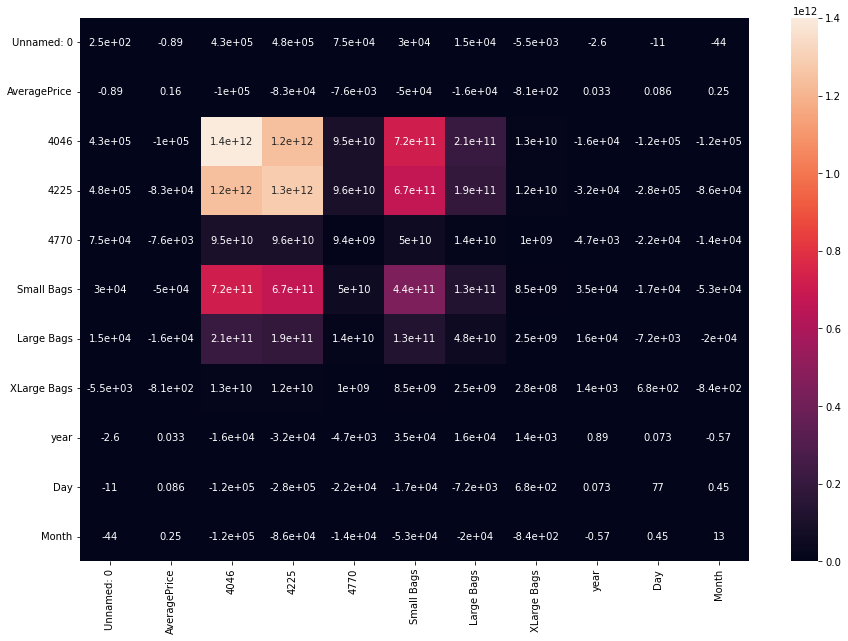

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.cov(), annot=True)

### Data Cleaning and preprocessing

### Encoding the columns

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['type','region']
#
# Encode labels of multiple columns at once
#
rows[cols] = rows[cols].apply(LabelEncoder().fit_transform)

In [121]:
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
11430,16,2.00,541.49,1732.31,545.05,1166.16,47.40,0.0,1,2015,44,6,9
10857,15,1.90,5346.57,1082.07,0.00,968.39,225.52,0.0,1,2015,33,13,9
3080,12,1.35,1119.57,62757.12,90.39,68176.45,0.00,0.0,0,2016,5,2,10
1407,3,0.94,117854.69,21553.04,325.00,41822.80,3839.67,0.0,0,2015,27,6,12
7660,30,1.38,68705.59,108536.25,2472.06,77842.84,1729.76,1765.0,0,2017,38,4,6


### Removing outliers using z-score method

In [122]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(rows))

# Creating new dataframe
new_avd=rows[(z<3).all(axis=1)]
new_avd


,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
11430,16,2.00,541.49,1732.31,545.05,1166.16,47.40,0.00,1,2015,44,6,9
10857,15,1.90,5346.57,1082.07,0.00,968.39,225.52,0.00,1,2015,33,13,9
3080,12,1.35,1119.57,62757.12,90.39,68176.45,0.00,0.00,0,2016,5,2,10
1407,3,0.94,117854.69,21553.04,325.00,41822.80,3839.67,0.00,0,2015,27,6,12
7660,30,1.38,68705.59,108536.25,2472.06,77842.84,1729.76,1765.00,0,2017,38,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17046,26,2.35,1634.38,18664.45,43.00,262.08,13664.34,0.00,1,2017,43,2,7
13925,16,1.29,130.62,4206.95,327.14,2581.02,3440.09,0.00,1,2016,38,4,9
12710,49,1.53,1295.76,471.18,0.00,326.67,6.16,0.00,1,2016,14,17,1
9438,0,1.45,14306.68,50893.97,0.00,29507.45,3868.53,0.00,1,2015,6,27,12


In [123]:
rows.shape

(4562, 13)

In [124]:
new_avd.shape

(4404, 13)

#### Percentage loss of data

In [125]:
# Let's check the the data loss
data_loss = (4562-4440)/4562*100
print('The  Data_loss from Zscore  is :',data_loss)
print("This is acceptable  range ")

The  Data_loss from Zscore  is : 2.6742656729504604
This is acceptable  range 


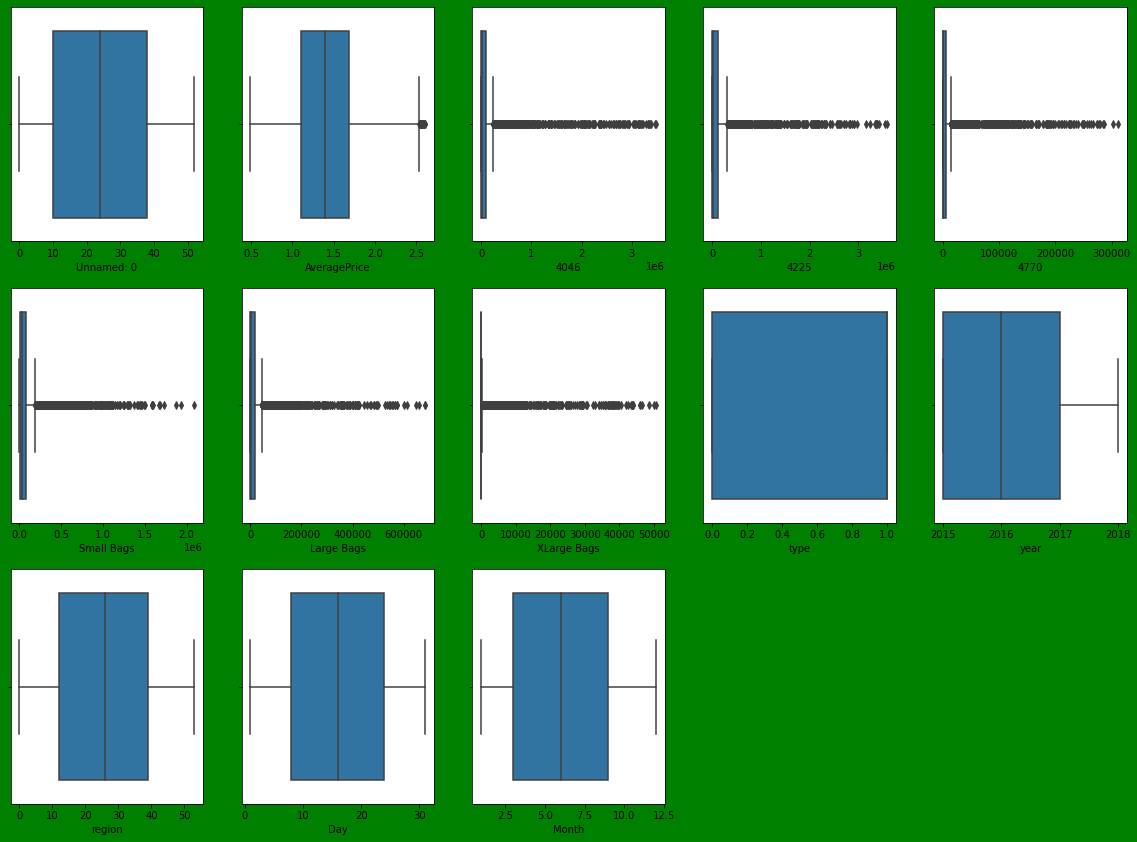

In [126]:
plt.figure(figsize=(20,25),facecolor='green')
plotnum = 1
for feature in new_avd:
    if plotnum <= 16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(new_avd[feature])
        plt.xlabel(feature)
    plotnum+=1
plt.show()

### Diving the dataset into x and y before Transformation

In [127]:
x = new_avd.drop(['AveragePrice'], axis=1)
y =new_avd.iloc[:,0]

### Removing the skewness using PowerTransformer

In [128]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson',)

In [129]:
x

array([[-0.37594366, -0.84935386, -0.92036756, ...,  1.12308498,
        -1.11283001,  0.81202951],
       [-0.44546748, -0.1783156 , -1.06648565, ...,  0.51965811,
        -0.24689562,  0.81202951],
       [-0.66512467, -0.64579896,  0.4111938 , ..., -1.43179645,
        -1.7079326 ,  1.0394536 ],
       ...,
       [ 1.40273393, -0.60381885, -1.31055422, ..., -0.69204163,
         0.19714039, -1.62874464],
       [-1.95685852,  0.13764554,  0.32174299, ..., -1.33818769,
         1.21444958,  1.46929007],
       [ 0.07201637,  0.10312327,  1.49366382, ...,  0.22657629,
         0.19714039,  0.32572462]])

In [130]:
x =pd.DataFrame(x)

In [131]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.375944,-0.849354,-0.920368,0.364587,-1.076691,-0.931569,-0.677659,0.982443,-1.211774,1.123085,-1.112830,0.812030
1,-0.445467,-0.178316,-1.066486,-1.232074,-1.136528,-0.575735,-0.677659,0.982443,-1.211774,0.519658,-0.246896,0.812030
2,-0.665125,-0.645799,0.411194,-0.077263,0.587379,-1.635745,-0.677659,-1.017871,-0.149126,-1.431796,-1.707933,1.039454
3,-1.501226,0.875829,-0.028778,0.237964,0.346611,0.219986,-0.677659,-1.017871,-1.211774,0.166217,-1.112830,1.469290
4,0.470556,0.678597,0.652772,0.731354,0.654938,-0.024900,1.616772,-1.017871,0.911680,0.800179,-1.395342,0.063092
...,...,...,...,...,...,...,...,...,...,...,...,...
4399,0.247768,-0.536417,-0.085005,-0.260411,-1.524577,0.647965,-0.677659,0.982443,0.911680,1.070199,-1.707933,0.325725
4400,-0.375944,-1.223828,-0.628266,0.239575,-0.806764,0.185184,-0.677659,0.982443,-0.149126,0.800179,-1.395342,0.812030
4401,1.402734,-0.603819,-1.310554,-1.232074,-1.463032,-1.309039,-0.677659,0.982443,-0.149126,-0.692042,0.197140,-1.628745
4402,-1.956859,0.137646,0.321743,-1.232074,0.182389,0.222370,-0.677659,0.982443,-1.211774,-1.338188,1.214450,1.469290


### Again checking for skewness

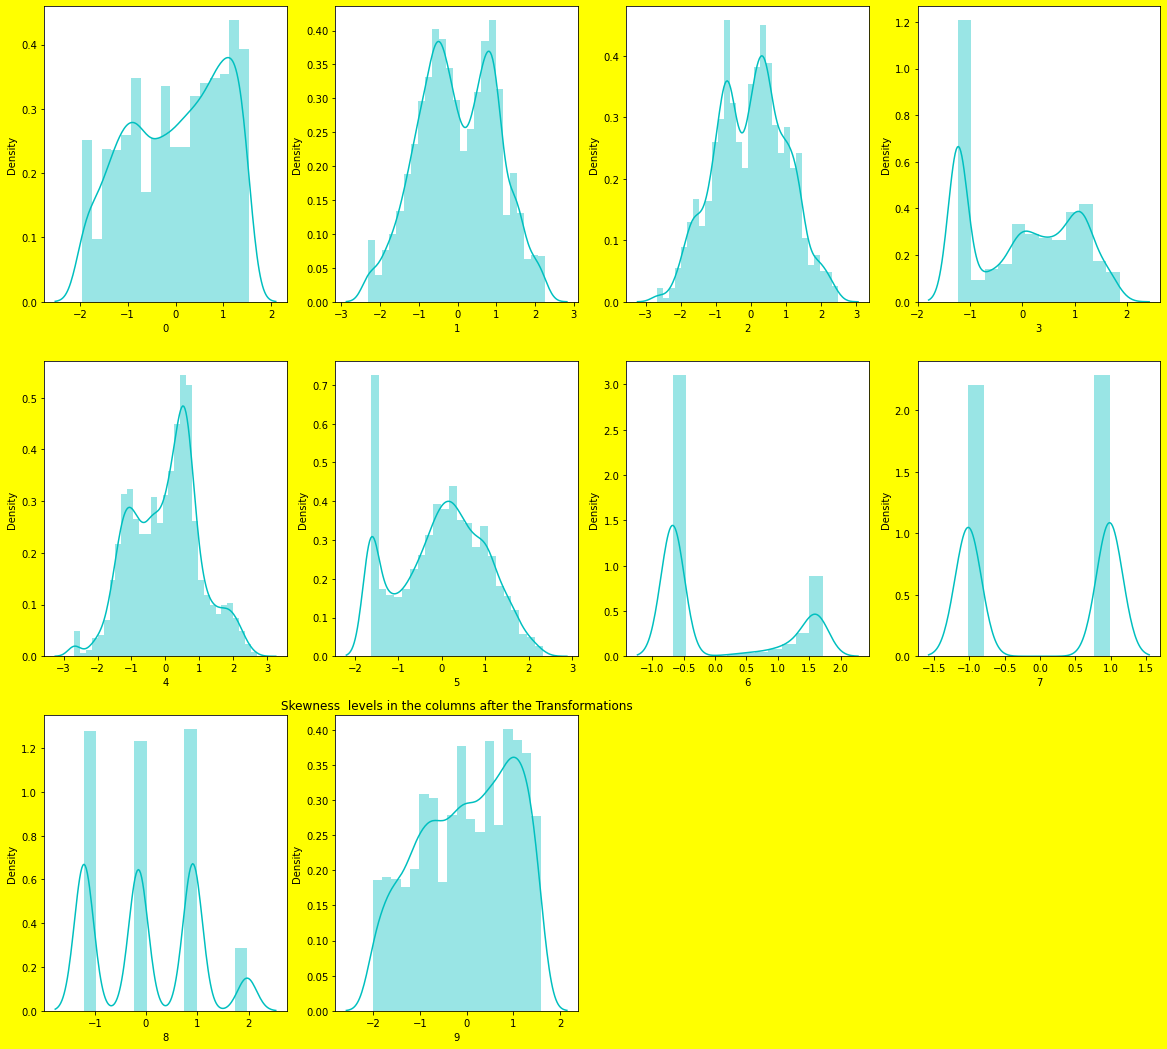

In [132]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnum = 1
for i in x[[0,1,2,3,4,5,6,7,8,9,10]]:
    if plotnum <=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[i], color='c')
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.title('Skewness  levels in the columns after the Transformations')
plt.show()

Normally Distributed data with removed skewness by the transformer.

In [133]:
new_avd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4404 entries, 11430 to 4287
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4404 non-null   int64  
 1   AveragePrice  4404 non-null   float64
 2   4046          4404 non-null   float64
 3   4225          4404 non-null   float64
 4   4770          4404 non-null   float64
 5   Small Bags    4404 non-null   float64
 6   Large Bags    4404 non-null   float64
 7   XLarge Bags   4404 non-null   float64
 8   type          4404 non-null   int32  
 9   year          4404 non-null   int64  
 10  region        4404 non-null   int32  
 11  Day           4404 non-null   int64  
 12  Month         4404 non-null   int64  
dtypes: float64(7), int32(2), int64(4)
memory usage: 447.3 KB


### Scaling the columns using the Standard Scaler

In [134]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

In [135]:
scaled_x

array([[-0.37594366, -0.84935386, -0.92036756, ...,  1.12308498,
        -1.11283001,  0.81202951],
       [-0.44546748, -0.1783156 , -1.06648565, ...,  0.51965811,
        -0.24689562,  0.81202951],
       [-0.66512467, -0.64579896,  0.4111938 , ..., -1.43179645,
        -1.7079326 ,  1.0394536 ],
       ...,
       [ 1.40273393, -0.60381885, -1.31055422, ..., -0.69204163,
         0.19714039, -1.62874464],
       [-1.95685852,  0.13764554,  0.32174299, ..., -1.33818769,
         1.21444958,  1.46929007],
       [ 0.07201637,  0.10312327,  1.49366382, ...,  0.22657629,
         0.19714039,  0.32572462]])

### Using Variation inflation factor for checking multicollinearity

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(scaled_x):
    #Calculating VIF
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
    return vif
vif = calc_VIF(scaled_x)

In [137]:
vif

,Features,VIF
0,0,2.902551
1,1,3.727375
2,2,4.167977
3,3,3.919610
4,4,4.086870
5,5,1.846427
6,6,1.985693
7,7,3.513557
8,8,1.682983
9,9,1.089025


In [138]:
x= scaled_x

### Feature Engineering

K best

Variance threshold

In [139]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [140]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [141]:
x = pd.DataFrame(x)

In [142]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [143]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print('One column is  to be  removed ---',len(cons_columns))

One column is  to be  removed --- 0


so according to the Variance Threshold method we have to remove the 7th column

In [144]:
# K BEST
from sklearn.feature_selection import SelectKBest, f_classif

In [145]:
bestfeat = SelectKBest(score_func = f_classif, k =10)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [146]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

    Feature       Score
11       11  165.539029
10       10  103.301977
8         8    6.044533
6         6    2.239869
5         5    1.032043
1         1    0.782781
9         9    0.765929
3         3    0.696213
2         2    0.694168
4         4    0.653950


In [147]:
x_best = x.drop(columns=[8,9])

In [148]:
x_best_scaled = scalar.fit_transform(x_best)

In [149]:
x_best_scaled

array([[-0.37594366, -0.84935386, -0.92036756, ...,  0.98244293,
        -1.11283001,  0.81202951],
       [-0.44546748, -0.1783156 , -1.06648565, ...,  0.98244293,
        -0.24689562,  0.81202951],
       [-0.66512467, -0.64579896,  0.4111938 , ..., -1.01787083,
        -1.7079326 ,  1.0394536 ],
       ...,
       [ 1.40273393, -0.60381885, -1.31055422, ...,  0.98244293,
         0.19714039, -1.62874464],
       [-1.95685852,  0.13764554,  0.32174299, ...,  0.98244293,
         1.21444958,  1.46929007],
       [ 0.07201637,  0.10312327,  1.49366382, ..., -1.01787083,
         0.19714039,  0.32572462]])

### Model devlopment for prediction

Importing all the model and libs for model creation

In [150]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

### Finding the best Random state for the model

In [151]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9999999929984352 on random_state: 73


### Training all the Models in same list with Def func call

With K fold Cross validation

In [152]:
models= [RandomForestRegressor(n_estimators=450,random_state=54, max_depth=3,),SVR(kernel='linear'),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,subsample=0.1, random_state=39)]
x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size=.33,random_state=39)

def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x_best_scaled,y,cv=6).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

R2 score of the model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=54) = 98.9 %
mean squared error for model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=54) = 2.7709232372199635
cross val score for model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=54) = 0.9883670188428688
_______________________________________________
R2 score of the model :  SVR(kernel='linear') = 97.8 %
mean squared error for model :  SVR(kernel='linear') = 5.440829432010962
cross val score for model :  SVR(kernel='linear') = 0.9772264066843642
_______________________________________________
R2 score of the model :  KNeighborsRegressor() = 98.0 %
mean squared error for model :  KNeighborsRegressor() = 4.977331499312242
cross val score for model :  KNeighborsRegressor() = 0.9820267930976829
_______________________________________________
R2 score of the model :  SGDRegressor() = 98.5 %
mean squared error for model :  SGDRegressor() = 3.83130203

### Best R2 score lies with GradientBoostingRegressor i.e 0.9999997264754122

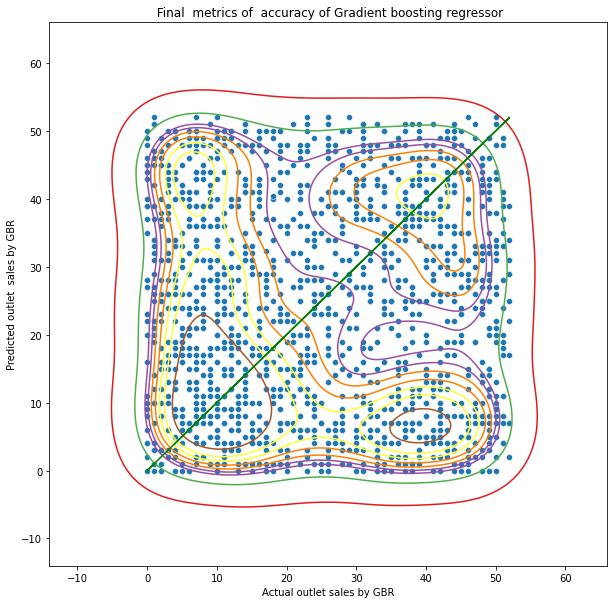

In [168]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred,palette='Set2')
sns.kdeplot(x=y_test,y=pred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet sales by GBR")
plt.ylabel("Predicted outlet  sales by GBR")
plt.title(" Final  metrics of  accuracy of Gradient boosting regressor")
plt.show()